In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.shape)
df.head()


(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df["Churn"].value_counts()
df["Churn"].value_counts(normalize=True) * 100


,proportion
Churn,
No,73.463013
Yes,26.536987


In [ ]:
# Convert TotalCharges to numeric (some values are blank strings)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check missing values in each column
missing = df.isnull().sum().sort_values(ascending=False)
missing


,0
TotalCharges,11
gender,0
SeniorCitizen,0
Partner,0
customerID,0
Dependents,0
tenure,0
MultipleLines,0
PhoneService,0
OnlineSecurity,0


In [ ]:
df = df.dropna(subset=["TotalCharges"])

print("After removing missing TotalCharges:", df.shape)


After removing missing TotalCharges: (7032, 21)


In [ ]:
print("Churn count:")
print(df["Churn"].value_counts())

print("\nChurn percentage:")
print(df["Churn"].value_counts(normalize=True) * 100)


Churn count:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn percentage:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


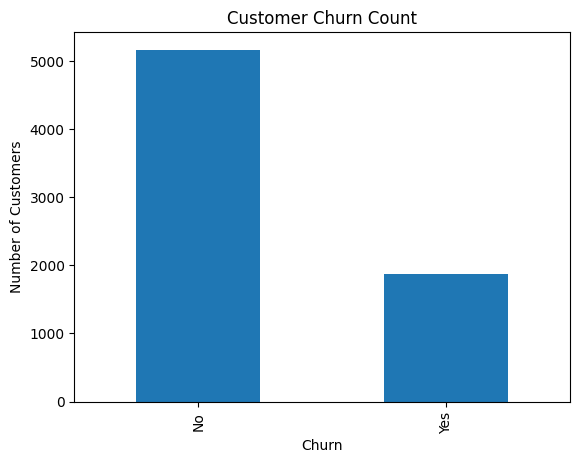

In [ ]:
df["Churn"].value_counts().plot(kind="bar")
plt.title("Customer Churn Count")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

churn_by_contract = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack()

churn_by_contract


Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


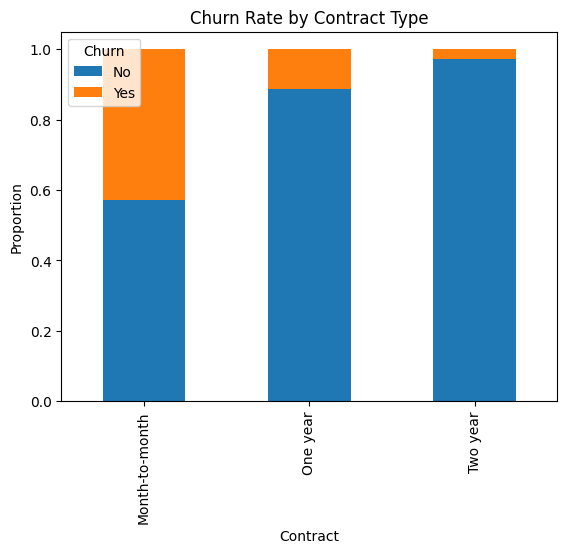

In [ ]:
churn_by_contract.plot(kind="bar", stacked=True)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion")
plt.show()


In [ ]:
df.groupby("Churn")["MonthlyCharges"].mean()


,MonthlyCharges
Churn,
No,61.307408
Yes,74.441332


In [ ]:
df.groupby("Churn")["tenure"].mean()


,tenure
Churn,
No,37.650010
Yes,17.979133


In [ ]:
# 1) Drop customerID (not useful for prediction)
df_ml = df.drop(columns=["customerID"]).copy()

# 2) Convert Churn to 0/1 (Yes -> 1, No -> 0)
df_ml["Churn"] = df_ml["Churn"].map({"Yes": 1, "No": 0})

# 3) One-hot encode all text columns (convert categories to numeric columns)
df_encoded = pd.get_dummies(df_ml, drop_first=True)

print("Original columns:", df_ml.shape[1])
print("After encoding columns:", df_encoded.shape[1])
df_encoded.head()


Original columns: 20
After encoding columns: 31


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Churn", axis=1)  # features (inputs)
y = df_encoded["Churn"]               # target (output)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (5625, 30)
Test size: (1407, 30)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8031272210376688

Confusion Matrix:
 [[916 117]
 [160 214]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Pipeline = step-by-step machine learning flow
pipe = Pipeline([
    ("scaler", StandardScaler()),                  # Step 1: scale numeric values
    ("model", LogisticRegression(max_iter=5000))    # Step 2: train logistic regression
])

pipe.fit(X_train, y_train)

print("Model trained with scaling successfully!")


Model trained with scaling successfully!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8038379530916845

Confusion Matrix:
 [[916 117]
 [159 215]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [ ]:
feature_names = X.columns
coefficients = pipe.named_steps["model"].coef_[0]

importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

importance.head(10)


,Feature,Coefficient
10,InternetService_Fiber optic,0.727745
3,TotalCharges,0.639028
21,StreamingTV_Yes,0.249702
23,StreamingMovies_Yes,0.236368
9,MultipleLines_Yes,0.214359
28,PaymentMethod_Electronic check,0.181473
26,PaperlessBilling_Yes,0.142663
0,SeniorCitizen,0.070792
17,DeviceProtection_Yes,0.068965
29,PaymentMethod_Mailed check,0.033392


In [ ]:
importance.tail(10)


,Feature,Coefficient
18,TechSupport_No internet service,-0.088138
16,DeviceProtection_No internet service,-0.088138
22,StreamingMovies_No internet service,-0.088138
6,Dependents_Yes,-0.105956
19,TechSupport_Yes,-0.118240
13,OnlineSecurity_Yes,-0.136804
24,Contract_One year,-0.310898
25,Contract_Two year,-0.602591
2,MonthlyCharges,-0.851551
1,tenure,-1.347613


In [ ]:
top_pos = importance.sort_values("Coefficient", ascending=False).head(10)
top_neg = importance.sort_values("Coefficient", ascending=True).head(10)

print("Top 10 churn-increasing features:")
print(top_pos)

print("\nTop 10 churn-decreasing features:")
print(top_neg)


Top 10 churn-increasing features:
                           Feature  Coefficient
10     InternetService_Fiber optic     0.727745
3                     TotalCharges     0.639028
21                 StreamingTV_Yes     0.249702
23             StreamingMovies_Yes     0.236368
9                MultipleLines_Yes     0.214359
28  PaymentMethod_Electronic check     0.181473
26            PaperlessBilling_Yes     0.142663
0                    SeniorCitizen     0.070792
17            DeviceProtection_Yes     0.068965
29      PaymentMethod_Mailed check     0.033392

Top 10 churn-decreasing features:
                               Feature  Coefficient
1                               tenure    -1.347613
2                       MonthlyCharges    -0.851551
25                   Contract_Two year    -0.602591
24                   Contract_One year    -0.310898
13                  OnlineSecurity_Yes    -0.136804
19                     TechSupport_Yes    -0.118240
6                       Dependents_Yes 

In [12]:
import os
os.listdir("/content")


['.config', 'churn.db', 'sample_data', 'WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [13]:
import pandas as pd
import sqlite3

# Load CSV
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Clean numeric column
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"])

print("Rows after cleaning:", df.shape)


Rows after cleaning: (7032, 21)


In [14]:
conn = sqlite3.connect("/content/churn.db")

df.to_sql("telco_churn", conn, if_exists="replace", index=False)

print("SQL table created successfully!")


SQL table created successfully!


In [15]:
pd.read_sql("SELECT COUNT(*) AS total_customers FROM telco_churn;", conn)


,total_customers
0,7032


In [16]:
pd.read_sql("""
SELECT
ROUND(100.0 * SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)/COUNT(*),2) AS churn_rate
FROM telco_churn;
""", conn)


,churn_rate
0,26.58


In [17]:
pd.read_sql("""
SELECT Contract,
COUNT(*) customers,
ROUND(100.0 * SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)/COUNT(*),2) churn_rate
FROM telco_churn
GROUP BY Contract
ORDER BY churn_rate DESC;
""", conn)


,Contract,customers,churn_rate
0,Month-to-month,3875,42.71
1,One year,1472,11.28
2,Two year,1685,2.85


In [18]:
pd.read_sql("""
SELECT
  PaymentMethod,
  COUNT(*) AS customers,
  ROUND(100.0 * SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)/COUNT(*),2) AS churn_rate
FROM telco_churn
GROUP BY PaymentMethod
ORDER BY churn_rate DESC;
""", conn)


,PaymentMethod,customers,churn_rate
0,Electronic check,2365,45.29
1,Mailed check,1604,19.20
2,Bank transfer (automatic),1542,16.73
3,Credit card (automatic),1521,15.25


In [19]:
pd.read_sql("""
SELECT
  InternetService,
  COUNT(*) AS customers,
  ROUND(100.0 * SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)/COUNT(*),2) AS churn_rate
FROM telco_churn
GROUP BY InternetService
ORDER BY churn_rate DESC;
""", conn)


,InternetService,customers,churn_rate
0,Fiber optic,3096,41.89
1,DSL,2416,19.00
2,No,1520,7.43


In [20]:
pd.read_sql("""
SELECT
  ROUND(SUM(CASE WHEN Churn='Yes' THEN MonthlyCharges ELSE 0 END), 2) AS monthly_revenue_at_risk
FROM telco_churn;
""", conn)


,monthly_revenue_at_risk
0,139130.85
